In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
price_df = pd.read_csv('data/Housing_SalePrice_US.csv')
price_df.head()

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [3]:
# Datetime objects are easier to work with

print(price_df.info())

price_df['DATE'] = pd.to_datetime(price_df['DATE'], format='%Y-%m-%d')

# After
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    237 non-null    object 
 1   MSPUS   237 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    237 non-null    datetime64[ns]
 1   MSPUS   237 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


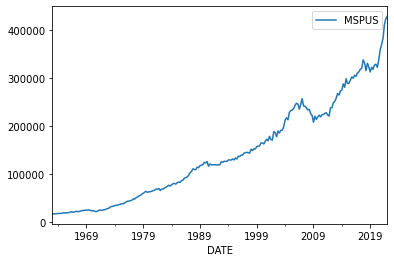

In [4]:
price_df.plot.line('DATE', 'MSPUS')
plt.show()

In [5]:
macro_df = pd.read_csv('data/Macroecon_US.csv')

# Get the Date column in to a format strftime can handle
macro_df['Date'] = macro_df['Date'].astype('str') + '.01'  # Assume data is from the first of each month
macro_df['Date'] = macro_df['Date'].str.replace('.', '-')
print(macro_df.head())

# Convert to datetime object
macro_df['Date'] = pd.to_datetime(macro_df['Date'], format='%Y.%m')

macro_df.head()

         Date  S&P Comp.  Dividend  Earnings    Consumer Price Index CPI  \
0  1871-01-01       4.44      0.26       0.4                       12.46   
1  1871-02-01       4.50      0.26       0.4                       12.84   
2  1871-03-01       4.61      0.26       0.4                       13.03   
3  1871-04-01       4.74      0.26       0.4                       12.56   
4  1871-05-01       4.86      0.26       0.4                       12.27   

   Date Fraction    Long Interest Rate GS10  Real Price  Real Dividend  \
0          1871.04                     5.32      103.43           6.06   
1          1871.13                     5.32      101.72           5.88   
2          1871.21                     5.33      102.68           5.79   
3          1871.29                     5.33      109.58           6.01   
4          1871.38                     5.33      114.97           6.15   

   Real Total Return Price   ...  Excess CAPE Yield  \
0                   103.43   ...           

/tmp/ipykernel_8923/835139016.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  macro_df['Date'] = macro_df['Date'].str.replace('.', '-')


,Date,S&P Comp.,Dividend,Earnings,Consumer Price Index CPI,Date Fraction,Long Interest Rate GS10,Real Price,Real Dividend,Real Total Return Price,...,Excess CAPE Yield,Monthly Total Bond Returns,Real Total Bond Returns,10 Year Annualized Stock Real Return,10 Year Annualized Bonds Real Return,Real 10 Year Excess Annualized Returns,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1871-01-01,4.44,0.26,0.4,12.46,1871.04,5.32,103.43,6.06,103.43,...,NaN,1.0,1.00,13.06%,9.25%,3.81%,NaN,NaN,NaN,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,1871.13,5.32,101.72,5.88,102.21,...,NaN,1.0,0.97,13.09%,9.46%,3.62%,NaN,NaN,NaN,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,1871.21,5.33,102.68,5.79,103.66,...,NaN,1.0,0.96,13.10%,9.62%,3.48%,NaN,NaN,NaN,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,1871.29,5.33,109.58,6.01,111.13,...,NaN,1.0,1.00,12.21%,9.10%,3.11%,NaN,NaN,NaN,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,1871.38,5.33,114.97,6.15,117.11,...,NaN,1.0,1.03,12.26%,8.95%,3.31%,NaN,NaN,NaN,NaN


In [6]:
supply_df = pd.read_csv('data/Monthly_Supply_New_Houses_US.csv')

supply_df['DATE'] = pd.to_datetime(supply_df['DATE'], format='%Y-%m-%d')

supply_df.head()

,DATE,MSACSR
0,1963-01-01,4.7
1,1963-02-01,6.6
2,1963-03-01,6.4
3,1963-04-01,5.3
4,1963-05-01,5.1


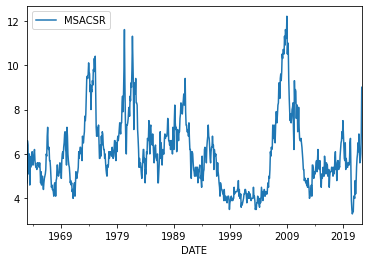

In [7]:
supply_df.plot.line('DATE', 'MSACSR')
plt.show()

# Model

In [8]:
import torch
import sklearn.model_selection
import sklearn.preprocessing

/home/harrison/anaconda3/envs/mas-thesis/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Wrangling

In [9]:
# Sum every 3 months to get cumulative quarterly supply change
agg_func_supply = {'DATE': 'first', 'MSACSR': 'sum'}  # Keep the first date and sum supply
quarterly_supply = supply_df.groupby(supply_df.index // 3).agg(agg_func_supply)

# Trim last quarter to match price data length
quarterly_supply = quarterly_supply[:-1]

# Set date columns to indices for time-series
quarterly_supply = quarterly_supply.set_index('DATE')
prices = price_df.set_index('DATE')

print(quarterly_supply.shape, prices.shape)
quarterly_supply.head()

(237, 1) (237, 1)


,MSACSR
DATE,
1963-01-01,17.7
1963-04-01,16.4
1963-07-01,15.6
1963-10-01,17.5
1964-01-01,17.1


### Data Interpolation

In [55]:
df = supply_df.merge(price_df, on='DATE', how='left')  # Combine data into df for interpolation
df = df.set_index('DATE')  # Index must be datetime for resampling

print(df.head(10))

            MSACSR    MSPUS
DATE                       
1963-01-01     4.7  17800.0
1963-02-01     6.6      NaN
1963-03-01     6.4      NaN
1963-04-01     5.3  18000.0
1963-05-01     5.1      NaN
1963-06-01     6.0      NaN
1963-07-01     4.6  17900.0
1963-08-01     5.6      NaN
1963-09-01     5.4      NaN
1963-10-01     5.9  18500.0


In [54]:
df_pad = df
df_pad['MSPUS'] = df['MSPUS'].interpolate()

df_pad.head(10)

,MSACSR,MSPUS
DATE,,
1963-01-01,4.7,17800.000000
1963-02-01,6.6,17866.666667
1963-03-01,6.4,17933.333333
1963-04-01,5.3,18000.000000
1963-05-01,5.1,17966.666667
1963-06-01,6.0,17933.333333
1963-07-01,4.6,17900.000000
1963-08-01,5.6,18100.000000
1963-09-01,5.4,18300.000000


### Data Pre-Processing

In [61]:
quarterly_supply = df_pad.drop('MSPUS', axis=1)
prices = df_pad.drop('MSACSR', axis=1)

print(quarterly_supply.shape, prices.shape)

X = quarterly_supply
y = prices

            MSACSR
DATE              
1963-01-01     4.7
1963-02-01     6.6
1963-03-01     6.4
1963-04-01     5.3
1963-05-01     5.1
...            ...
2021-12-01     5.6
2022-01-01     5.7
2022-02-01     6.0
2022-03-01     6.9
2022-04-01     9.0

[712 rows x 1 columns]
(712, 1) (712, 1)


In [62]:
# Make train and validation sets
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.2)


# Convert datasets to nodes in computational graph
X_train_tensors = torch.Tensor(X_train.values)
y_train_tensors = torch.Tensor(y_train.values)
X_val_tensors = torch.Tensor(y_train.values)
y_val_tensors = torch.Tensor(y_val.values)

# Convert to sequential data for pytorch
X_train_tensors = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_val_tensors = torch.reshape(X_val_tensors, (X_val_tensors.shape[0], 1, X_val_tensors.shape[1]))

print(X_train_tensors.shape)
print(X_val_tensors.shape)

torch.Size([569, 1, 1])
torch.Size([569, 1, 1])


### Define the Model

In [63]:
class LSTM(torch.nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = torch.nn.LSTM(input_size = input_size,
                            hidden_size = hidden_size,
                            num_layers = num_layers,
                            batch_first=True
                           )
        self.fully_connected1 = torch.nn.Linear(hidden_size, 128)
        self.fully_connected2 = torch.nn.Linear(128, num_classes)
        
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        # Initialize states
        initial_hidden_state   = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        initial_internal_state = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        # Propogate forward
        output, (hidden_state, internal_state) = self.lstm(x, (initial_hidden_state, initial_internal_state))
        hidden_state = hidden_state.view(-1, self.hidden_size)  # Reshape for next dense layer
        output = self.relu(hidden_state)
        output = self.fully_connected1(output)
        output = self.relu(output)
        output = self.fully_connected2(output)
        
        return output
        

### Run Model

In [ ]:
# Model parameters
N_CLASSES = 1
INPUT_SIZE = X_train_tensors.shape[2]  # Number of features
HIDDEN_SIZE = 2 # Number of features in hidden state
N_LAYERS = 1  # Number of stacked LSTM layers
BIAS = X_train_tensors.shape[1]

# Training parameters
N_EPOCHS = 100000
LEARNING_RATE = 0.01
loss_func = torch.nn.MSELoss()


lstm = LSTM(N_CLASSES, INPUT_SIZE, HIDDEN_SIZE, N_LAYERS, BIAS)

# Training loop
optimizer = torch.optim.Adam(lstm.parameters(), lr=LEARNING_RATE)
for epoch_i in range(1, N_EPOCHS+1):
    # Forward propogation
    outputs = lstm.forward(X_train_tensors)
    optimizer.zero_grad()  # Manually set gradient to 0 here
    
    # Backward propogation
    np_outputs = outputs.detach().numpy()
    #if np.all(np_outputs == np_outputs[0]):
        #print('Epoch {}: All outputs the same'.format(epoch_i))
    loss = loss_func(outputs, y_train_tensors)
    loss.backward()
    
    optimizer.step()
    if epoch_i % 1000 == 0:
        print('Epoch: {}, loss: {:.2f}'.format(epoch_i, loss.item()))

Epoch: 1000, loss: 24406904832.00
Epoch: 2000, loss: 14013699072.00
Epoch: 3000, loss: 10901055488.00
Epoch: 4000, loss: 10761965568.00
Epoch: 5000, loss: 10761669632.00
Epoch: 6000, loss: 10761670656.00
Epoch: 7000, loss: 10761670656.00
Epoch: 8000, loss: 10761669632.00
Epoch: 9000, loss: 10761668608.00
Epoch: 10000, loss: 10761670656.00
Epoch: 11000, loss: 10761669632.00
Epoch: 12000, loss: 10761669632.00
Epoch: 13000, loss: 10761670656.00
Epoch: 14000, loss: 10761670656.00
Epoch: 15000, loss: 10761670656.00
Epoch: 16000, loss: 10761670656.00
Epoch: 17000, loss: 10761670656.00
Epoch: 18000, loss: 10761670656.00
Epoch: 19000, loss: 10761670656.00
Epoch: 20000, loss: 10761670656.00
Epoch: 21000, loss: 10761670656.00
Epoch: 22000, loss: 10761670656.00
Epoch: 23000, loss: 10761670656.00
Epoch: 24000, loss: 10761668608.00
Epoch: 25000, loss: 10761669632.00
Epoch: 26000, loss: 10761669632.00
Epoch: 27000, loss: 10761670656.00
Epoch: 28000, loss: 10761669632.00
Epoch: 29000, loss: 107616706

### Evaluate

tensor([[[129700.]],

        [[127000.]],

        [[ 69200.]],

        [[ 35600.]],

        [[217600.]],

        [[153000.]],

        [[289100.]],

        [[ 22100.]],

        [[ 38100.]],

        [[126000.]],

        [[281000.]],

        [[ 22300.]],

        [[423600.]],

        [[322800.]],

        [[139900.]],

        [[ 70400.]],

        [[318400.]],

        [[235600.]],

        [[145000.]],

        [[157400.]],

        [[111500.]],

        [[288000.]],

        [[ 18500.]],

        [[126800.]],

        [[273600.]],

        [[ 86800.]],

        [[330900.]],

        [[ 22900.]],

        [[106000.]],

        [[ 37200.]],

        [[221100.]],

        [[251700.]],

        [[110000.]],

        [[ 34000.]],

        [[213500.]],

        [[ 69400.]],

        [[ 21500.]],

        [[ 23000.]],

        [[ 20300.]],

        [[ 62600.]],

        [[241800.]],

        [[ 88000.]],

        [[ 81000.]],

        [[212700.]],

        [[ 20200.]],

        [[

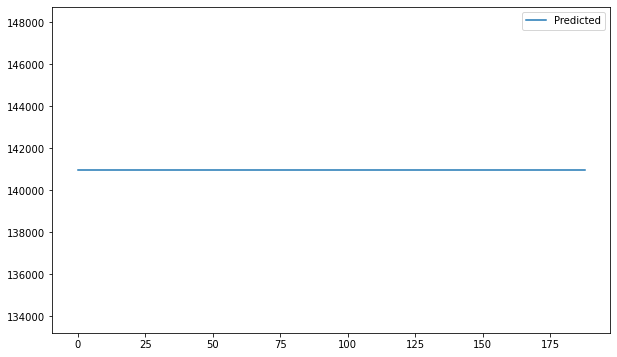

,MSPUS
DATE,
2000-07-01,168800.0
1971-10-01,25500.0
1969-07-01,25900.0
1997-10-01,144200.0
1965-07-01,20200.0


In [28]:
print(X_val_tensors)

val_predictions = lstm(X_val_tensors).data.numpy()  # Forward pass

plt.figure(figsize=(10, 6))

#plt.plot(y_val, label='Actual')
plt.plot(val_predictions, label='Predicted')
plt.legend()
plt.show()

y_val.head()

In [29]:
print(X_val_tensors.mean())

tensor(140977.2500)
